In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load model
model_path = "/content/drive/MyDrive/Def_Model.keras"
model = tf.keras.models.load_model(model_path)
print(model.summary())

# Class Labels Mapping
class_names = ['Nitrogen_Deficiency', 'Normal', 'Phosphorus_Deficiency', 'Potassium_Deficiency']

# Test directory
test_dir = "/content/drive/MyDrive/Paddy_Dataset/Deficiency"

# Image preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).resize((224, 224))
    image = np.array(image) / 255.0
    return np.expand_dims(image, axis=0)

# Prediction loop
true_labels, pred_labels = [], []

for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(test_dir, class_name)
    if not os.path.exists(class_folder):
        continue
    for image_name in os.listdir(class_folder):
        if image_name.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(class_folder, image_name)
            image = preprocess_image(image_path)
            predicted_class = np.argmax(model.predict(image, verbose=0))
            true_labels.append(class_index)
            pred_labels.append(predicted_class)

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Deficiency Detection Model")
plt.show()


present_labels = sorted(list(set(true_labels + pred_labels)))
present_class_names = [class_names[i] for i in present_labels]
# Classification Report
# Classification Report
report = classification_report(true_labels, pred_labels, target_names=class_names)
print("Classification Report:\n", report)


# Individual metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

print(f"\nAccuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 47040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    24,084,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,257,486 (287.08 MB)

 Trainable params: 24,087,044 (91.88 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

 Optimizer params: 48,174,090 (183.77 MB)

None


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x600 with 0 Axes>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 7, 7, 960)      │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 47040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    24,084,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,257,486 (287.08 MB)

 Trainable params: 24,087,044 (91.88 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

 Optimizer params: 48,174,090 (183.77 MB)

None


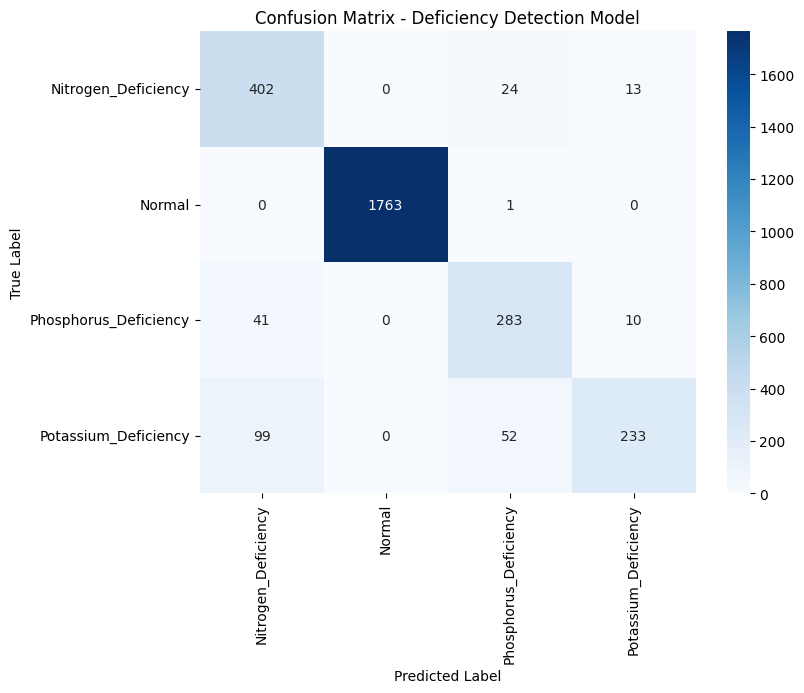

Classification Report:
                        precision    recall  f1-score   support

  Nitrogen_Deficiency       0.74      0.92      0.82       439
               Normal       1.00      1.00      1.00      1764
Phosphorus_Deficiency       0.79      0.85      0.82       334
 Potassium_Deficiency       0.91      0.61      0.73       384

             accuracy                           0.92      2921
            macro avg       0.86      0.84      0.84      2921
         weighted avg       0.92      0.92      0.92      2921


Accuracy:  91.78%
Precision: 92.49%
Recall:    91.78%
F1 Score:  91.59%


In [4]:
from google.colab import drive
drive.mount("/content/drive")
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load model
model_path = "/content/drive/MyDrive/Def_Model.keras"
model = tf.keras.models.load_model(model_path)
print(model.summary())

# Class Labels Mapping
class_names = ['Nitrogen_Deficiency', 'Normal', 'Phosphorus_Deficiency', 'Potassium_Deficiency']

# Test directory
test_dir = "/content/drive/MyDrive/Paddy_Dataset/Deficiencies"

# Image preprocessing function
def preprocess_image(image_path):
    image = Image.open(image_path).resize((224, 224))
    image = np.array(image) / 255.0
    return np.expand_dims(image, axis=0)

# Prediction loop
true_labels, pred_labels = [], []

for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(test_dir, class_name)
    if not os.path.exists(class_folder):
        continue
    for image_name in os.listdir(class_folder):
        if image_name.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(class_folder, image_name)
            image = preprocess_image(image_path)
            predicted_class = np.argmax(model.predict(image, verbose=0))
            true_labels.append(class_index)
            pred_labels.append(predicted_class)

# Get only the present labels
present_labels = sorted(list(set(true_labels + pred_labels)))
present_class_names = [class_names[i] for i in present_labels]

# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels, labels=present_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=present_class_names, yticklabels=present_class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Deficiency Detection Model")
plt.show()

# Classification Report
report = classification_report(true_labels, pred_labels, labels=present_labels, target_names=present_class_names)
print("Classification Report:\n", report)

# Individual metrics
accuracy = accuracy_score(true_labels, pred_labels)
precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)

print(f"\nAccuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall:    {recall * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")
